In [5]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

In [16]:
ls

-f1.csv                     metis_project_1/
More_Turnstiles.csv         more_turnstile_files/
More_Turnstiles_Backup.csv  my_file.txt
Nick_Project1.ipynb         turnstile/
Project1_Master.ipynb       turnstile_data.ipynb
Split_Turnstiles/           web.mta.info/
challenge_set_1_muhr.ipynb


In [17]:
# Reading year-long turnstile dataset
turnstile = pd.concat([pd.read_csv(f) for f in glob.glob('turnstile/*')], ignore_index = False)

In [24]:
turnstile.rename(columns = lambda x: x.strip(), inplace = True)
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026


In [25]:
turnstile.reset_index(drop = True, inplace = True)
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026


In [26]:
turnstile['COMBINED_INDICES'] = list(zip(turnstile['C/A'], turnstile['UNIT'], turnstile['SCP'], turnstile['STATION']))
turnstile['DATETIME'] = pd.to_datetime(turnstile['DATE'] + " " + turnstile['TIME'])

In [27]:
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINED_INDICES,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 19:00:00


In [29]:
group_indices = ['COMBINED_INDICES', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['COMBINED_INDICES', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['COMBINED_INDICES', 'DATE']).agg(min)
daily_difference = maxs - mins

In [30]:
daily_difference.head()

ENTRIES
COMBINED_INDICES              DATE               
(A002, R051, 02-00-00, 59 ST) 01/01/2019      447
                              01/02/2019     1442
                              01/03/2019     1506
                              01/04/2019     1512
                              01/05/2019      728

In [31]:
turnstile['CA_UNIT_STATION'] = list(zip(turnstile['C/A'], turnstile['UNIT'], turnstile['STATION']))
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINED_INDICES,DATETIME,CA_UNIT_STATION
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 03:00:00,"(A002, R051, 59 ST)"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 07:00:00,"(A002, R051, 59 ST)"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 11:00:00,"(A002, R051, 59 ST)"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 15:00:00,"(A002, R051, 59 ST)"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 19:00:00,"(A002, R051, 59 ST)"


In [32]:
group_indices = ['CA_UNIT_STATION', 'SCP', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['CA_UNIT_STATION', 'SCP', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['CA_UNIT_STATION', 'SCP', 'DATE']).agg(min)
daily_difference_scp = maxs - mins

In [33]:
daily_difference_scp.head()

ENTRIES
CA_UNIT_STATION     SCP      DATE               
(A002, R051, 59 ST) 02-00-00 01/01/2019      447
                             01/02/2019     1442
                             01/03/2019     1506
                             01/04/2019     1512
                             01/05/2019      728

In [34]:
group_indices = ['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['STATION', 'UNIT', 'C/A', 'SCP', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['STATION', 'UNIT', 'C/A', 'SCP', 'DATE']).agg(min)
daily_net_per_turnstile = maxs - mins
daily_net_per_turnstile.loc[('59 ST', 'R051', 'A002', '02-00-00')].head()

,ENTRIES
DATE,
01/01/2019,447
01/02/2019,1442
01/03/2019,1506
01/04/2019,1512
01/05/2019,728


In [35]:
daily_net_per_turnstile.reset_index(inplace = True)
daily_net_per_turnstile.head()

,STATION,UNIT,C/A,SCP,DATE,ENTRIES
0,1 AV,R248,H007,00-00-00,01/01/2019,1457
1,1 AV,R248,H007,00-00-00,01/02/2019,3456
2,1 AV,R248,H007,00-00-00,01/03/2019,3785
3,1 AV,R248,H007,00-00-00,01/04/2019,3806
4,1 AV,R248,H007,00-00-00,01/05/2019,2149


In [36]:
group_indices = ['STATION', 'DATE', 'ENTRIES']

daily_net_per_station = daily_net_per_turnstile[group_indices].groupby(by = ['STATION', 'DATE']).agg(sum)
daily_net_per_station.head()

ENTRIES
STATION DATE               
1 AV    01/01/2019     8376
        01/02/2019    17985
        01/03/2019    19210
        01/04/2019    19694
        01/05/2019    12448

In [37]:
#Entries per station
daily_net_per_station.reset_index(inplace = True)

In [38]:
q25, q50, q75 = np.nanpercentile(daily_net_per_station['ENTRIES'], [25, 50, 75])
print(q25, q50, q75)

3237.25 6421.5 13719.75


In [39]:
recover = daily_net_per_station

In [40]:
daily_net_per_station.loc[daily_net_per_station['ENTRIES'] > 200000, 'ENTRIES'] = q50
# Rows for daily net entries > 200,000 look completely bogus.
# Under 200,000 net entries the rows appear believable, i.e. multiple entries of 34 St Penn Station at ~150,000

In [47]:
daily_net_per_station.head()

,STATION,DATE,ENTRIES
0,1 AV,01/01/2019,8376.0
1,1 AV,01/02/2019,17985.0
2,1 AV,01/03/2019,19210.0
3,1 AV,01/04/2019,19694.0
4,1 AV,01/05/2019,12448.0


In [90]:
maxs = daily_net_per_station[['STATION', 'ENTRIES']].groupby(by = 'STATION').agg(max)
mins = daily_net_per_station[['STATION', 'ENTRIES']].groupby(by = 'STATION').agg(min)
daily_station_total_entries = maxs - mins

In [91]:
top_10_daily = daily_station_total_entries.head(10)
top_10_daily = daily_station_total_entries.sort_values(by = 'ENTRIES', ascending = False).head(10)

In [92]:
top_10_daily.reset_index(inplace = True)
top_10_daily.head()

,STATION,ENTRIES
0,PATH NEW WTC,199270.0
1,LACKAWANNA,195670.0
2,HARRISON,194891.0
3,NORTHERN BLVD,194720.0
4,14 ST-UNION SQ,190638.5


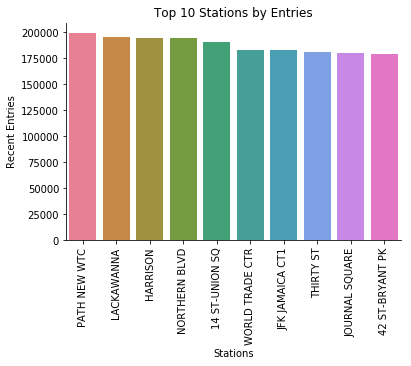

In [93]:
#Plotting top 10
ax = sns.barplot(x = top_10_daily['STATION'], y = top_10_daily['ENTRIES'],data=top_10_daily,palette = sns.color_palette("husl", 10))
ax.set(xlabel='Stations', ylabel='Recent Entries')
ax.set_title('Top 10 Stations by Entries')
plt.xticks(rotation=90)
sns.despine();